## Working With DataFrames (Part 1)

- The structure and content of dataframes
- New data: nutrition info
- Hands-on data munging and prep
- Plus: sampling, random numbers & more

In [514]:
import pandas as pd
import numpy as np

In [515]:
pd.__version__

'2.2.3'

#### What is DataFrame?

A DataFrame is a table of data's in the form of rows and coloms

DataFrame have two dimensions: labeled indicies and columns, where a series has only sequence of values with associated labels (indexes)

Each coloum in a dataframe is a series

Unlike series, dataframes could be heterogenous

In [516]:
names = ['Olga', 'Andrew', 'Brian', 'Telulah', 'Nicole', 'Tilda']
ages = [29, 21, 45, 23, 39, 46]
married = [False, True, True, True, False, True]

In [517]:
ser = pd.Series(names, name='name')

In [518]:
df = pd.DataFrame({'name': names, 'age': ages, 'married': married})

In [519]:
df

,name,age,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


In [520]:
ser # only one direction

0       Olga
1     Andrew
2      Brian
3    Telulah
4     Nicole
5      Tilda
Name: name, dtype: object

In [521]:
ser.iloc[2]

'Brian'

In [522]:
df.iloc[2, 0], type(df)

('Brian', pandas.core.frame.DataFrame)

In [523]:
df.iloc[2], type(df.iloc[2])

(name       Brian
 age           45
 married     True
 Name: 2, dtype: object,
 pandas.core.series.Series)

In [524]:
ser.ndim

1

In [525]:
df.ndim

2

In [526]:
ser.shape # 1D data structure

(6,)

In [527]:
df.shape # 2d data structure

(6, 3)

In [528]:
# collate - to collect in a given (or proper) order

In [529]:
ser

0       Olga
1     Andrew
2      Brian
3    Telulah
4     Nicole
5      Tilda
Name: name, dtype: object

In [530]:
df.name # dot access, w'll conver later in depth

0       Olga
1     Andrew
2      Brian
3    Telulah
4     Nicole
5      Tilda
Name: name, dtype: object

In [531]:
# df.dtype - won't work because it "heterogenous", dataframe doesn't have a overall data type, but each coloum has it's type hence, dtypes

In [532]:
df.dtypes

name       object
age         int64
married      bool
dtype: object

In [533]:
df.describe()

,age
count,6.000000
mean,33.833333
std,10.998485
min,21.000000
25%,24.500000
50%,34.000000
75%,43.500000
max,46.000000


## Creating A DataFrame

In [534]:
df

,name,age,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


In [535]:
names

['Olga', 'Andrew', 'Brian', 'Telulah', 'Nicole', 'Tilda']

In [536]:
ages

[29, 21, 45, 23, 39, 46]

In [537]:
married

[False, True, True, True, False, True]

In [538]:
pd.DataFrame({'name': names, 'age': ages })

,name,age
0,Olga,29
1,Andrew,21
2,Brian,45
3,Telulah,23
4,Nicole,39
5,Tilda,46


In [539]:
pd.DataFrame({'name': names, 'age': ages, 'married': married }) # each collection has same length

,name,age,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


In [540]:
len(names), len(ages), len(married)

(6, 6, 6)

In [541]:
# in real world you will most likely to import data set and create dataFrame out of that, instead of inserting
# all the data by yourself

## Four More Way To DataFrame

- dict of tuples
  - like dict of lists, but with tuples (column-wise)
- dict of series
  - a continuation of key concept #2 (column-wise)
- dict of dicts
  - key:value pairs with column names as keys and index-labeled key:value pairs containing values (column-wise)
- list of dicts
  - list of key:value pairs containing column label and values (row-wise)

In [542]:
tuple_names, tuple_ages, tuple_married = tuple(names), tuple(ages), tuple(married)

In [543]:
pd.DataFrame({ 'name': tuple_names, 'ages': tuple_ages, 'married': tuple_married })

,name,ages,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


In [544]:
df # same as above

,name,age,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


In [545]:
series_names, series_ages, series_married = pd.Series(names), pd.Series(ages), pd.Series(married)

In [546]:
pd.DataFrame({ 'name': series_names, 'ages': series_ages, 'married': series_married })

,name,ages,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


In [547]:
pd.DataFrame({ 'name': series_names, 'ages': series_ages, 'married': series_married }).shape

(6, 3)

In [548]:
pd.DataFrame({ 'names': ['a', 'b'] })

,names
0,a
1,b


In [549]:
pd.DataFrame({ 'names': {0:'a', 1:'b'} })

,names
0,a
1,b


In [550]:
list(enumerate(names))

[(0, 'Olga'),
 (1, 'Andrew'),
 (2, 'Brian'),
 (3, 'Telulah'),
 (4, 'Nicole'),
 (5, 'Tilda')]

In [551]:
def convert_list_to_dict(l):
    return { k:v for k,v in enumerate(l) }

In [552]:
dict_names, dict_ages, dict_married = convert_list_to_dict(names), convert_list_to_dict(ages), convert_list_to_dict(married)

In [553]:
dict_names

{0: 'Olga', 1: 'Andrew', 2: 'Brian', 3: 'Telulah', 4: 'Nicole', 5: 'Tilda'}

In [554]:
dict_ages

{0: 29, 1: 21, 2: 45, 3: 23, 4: 39, 5: 46}

In [555]:
dict_married

{0: False, 1: True, 2: True, 3: True, 4: False, 5: True}

In [556]:
pd.DataFrame({ 'name': dict_names, 'age': dict_ages, 'married': dict_married })

,name,age,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


In [557]:
pd.DataFrame([
    {
    'name': 'Olga',
    'age': 29,
    'married': False
    }
])

,name,age,married
0,Olga,29,False


In [558]:
list(zip(names, ages, married))

[('Olga', 29, False),
 ('Andrew', 21, True),
 ('Brian', 45, True),
 ('Telulah', 23, True),
 ('Nicole', 39, False),
 ('Tilda', 46, True)]

In [559]:
rowwise = [{'name': n, 'age': a, 'married': m} for n, a, m in zip(names, ages, married)]

In [560]:
rowwise

[{'name': 'Olga', 'age': 29, 'married': False},
 {'name': 'Andrew', 'age': 21, 'married': True},
 {'name': 'Brian', 'age': 45, 'married': True},
 {'name': 'Telulah', 'age': 23, 'married': True},
 {'name': 'Nicole', 'age': 39, 'married': False},
 {'name': 'Tilda', 'age': 46, 'married': True}]

In [561]:
# with open("copy.txt", "w") as file:
#     file.write("Your text goes here")

In [562]:
pd.DataFrame(rowwise)

,name,age,married
0,Olga,29,False
1,Andrew,21,True
2,Brian,45,True
3,Telulah,23,True
4,Nicole,39,False
5,Tilda,46,True


## The `info()` Method

In [563]:
df.info() # only work for dataFrame and not with others like series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     6 non-null      object
 1   age      6 non-null      int64 
 2   married  6 non-null      bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 230.0+ bytes


In [564]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 3 entries, name to married
dtypes: bool(1), int64(1), object(1)
memory usage: 230.0+ bytes


In [565]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     6 non-null      object
 1   age      6 non-null      int64 
 2   married  6 non-null      bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 557.0 bytes


In [566]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     6 non-null      object
 1   age      6 non-null      int64 
 2   married  6 non-null      bool  
dtypes: bool(1), int64(1), object(1)

In [567]:
df.info(max_cols=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 3 entries, name to married
dtypes: bool(1), int64(1), object(1)
memory usage: 230.0+ bytes


## Reading In Nutrition Data

In [568]:
# Dataset credit: Kaggle - communities of data scientist and ML enginner.

In [569]:
dataurl = 'https://andybek.com/pandas-nutrition'

In [570]:
nutrition = pd.read_csv(dataurl)

In [571]:
nutrition.head(10)

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
5,5,"Cauliflower, raw",100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,...,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g
6,6,"Taro leaves, raw",100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,...,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g
7,7,"Lamb, raw, ground",100 g,282,23g,10g,73mg,59.00 mg,69.3 mg,18.00 mcg,...,23.41 g,10.190 g,9.600 g,1.850 g,73.00 mg,0.0 g,0.87 g,0.00 mg,0.00 mg,59.47 g
8,8,"Cheese, camembert",100 g,300,24g,15g,72mg,842.00 mg,15.4 mg,62.00 mcg,...,24.26 g,15.259 g,7.023 g,0.724 g,72.00 mg,0.0 g,3.68 g,0.00 mg,0.00 mg,51.80 g
9,9,Vegetarian fillets,100 g,290,18g,2.8g,0,490.00 mg,82.0 mg,102.00 mcg,...,18.00 g,2.849 g,4.376 g,9.332 g,0.00 mg,0.0 g,5.00 g,0.00 mg,0.00 mg,45.00 g


In [572]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

In [573]:
nutrition.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Columns: 77 entries, Unnamed: 0 to water
dtypes: int64(3), object(74)
memory usage: 39.2 MB


## Some Cleanup: Removing The Duplicated Index

In [574]:
nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [575]:
nutrition.drop('Unnamed: 0', axis=1)

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [576]:
nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [577]:
nutrition.set_index('Unnamed: 0')

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g


In [578]:
nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [579]:
nutrition = pd.read_csv(dataurl, index_col=[0])

In [580]:
nutrition

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


## The `sample()` Method

In [581]:
nutrition.sample() # it returns a random record

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
1366,"Yogurt, whole milk, fruit, Greek",100 g,106,3g,1.6g,10mg,37.00 mg,14.3 mg,5.00 mcg,0.00 mcg,...,3.00 g,1.599 g,1.265 g,0.219 g,10.00 mg,0.0 g,0.56 g,0.00 mg,0.00 mg,76.81 g


In [582]:
nutrition.sample(random_state=12)

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
3713,"Thuringer, pork, beef, summer sausage, cervelat",100 g,362,30g,12g,74mg,1300.00 mg,78.9 mg,2.00 mcg,0.00 mcg,...,30.43 g,11.510 g,12.970 g,1.200 g,74.00 mg,0.0 g,3.63 g,0.00 mg,0.00 mg,45.18 g


In [583]:
nutrition.sample(n=3)

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
4365,"Mollusks, moist heat, cooked, wild, eastern, o...",100 g,102,3.4g,0.9g,79mg,166.00 mg,130.0 mg,14.00 mcg,0.00 mcg,...,3.42 g,0.948 g,0.506 g,1.056 g,79.00 mg,0.0 g,1.53 g,0.00 mg,0.00 mg,78.19 g
5639,"Veal, roasted, cooked, separable lean and fat,...",100 g,186,8.7g,3.5g,117mg,100.00 mg,0,11.00 mcg,0.00 mcg,...,8.67 g,3.460 g,3.240 g,0.640 g,117.00 mg,0,1.38 g,0,0,65.54 g
6134,"Pork, roasted, extra lean (approximately 5% fa...",100 g,145,5.5g,1.8g,53mg,1203.00 mg,85.1 mg,3.00 mcg,0.00 mcg,...,5.53 g,1.810 g,2.620 g,0.540 g,53.00 mg,0.0 g,4.37 g,0.00 mg,0.00 mg,67.67 g


In [584]:
nutrition.sample(frac=.001) # we have 90k records and we want just .001% of them

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
2974,"Cookies, refrigerated dough, chocolate chip",100 g,451,21g,8.4g,7mg,321.00 mg,0,57.00 mcg,48.00 mcg,...,21.33 g,8.390 g,10.414 g,2.172 g,7.00 mg,0.0 g,1.54 g,9.00 mg,72.00 mg,12.08 g
39,"Lentils, raw, sprouted",100 g,106,0.6g,0.1g,0,11.00 mg,0,100.00 mcg,0.00 mcg,...,0.55 g,0.057 g,0.104 g,0.219 g,0.00 mg,0,1.00 g,0,0,67.34 g
7569,"Beef, roasted, cooked, select, trimmed to 0"" f...",100 g,181,7.5g,2.8g,76mg,35.00 mg,101.2 mg,8.00 mcg,0.00 mcg,...,7.53 g,2.756 g,3.121 g,0.280 g,76.00 mg,0.0 g,1.12 g,0.00 mg,0.00 mg,65.54 g
7707,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,165,9.3g,3.6g,67mg,80.00 mg,59.9 mg,3.00 mcg,0.00 mcg,...,9.29 g,3.592 g,4.586 g,0.393 g,67.00 mg,0.0 g,0.98 g,0.00 mg,0.00 mg,69.89 g
4997,"Pork, roasted, canned, extra lean and regular,...",100 g,167,8.4g,2.8g,41mg,1068.00 mg,81.8 mg,5.00 mcg,0.00 mcg,...,8.43 g,2.810 g,4.060 g,0.900 g,41.00 mg,0.0 g,3.63 g,0.00 mg,0.00 mg,66.52 g
2156,"Pie, commercially prepared, egg custard",100 g,210,12g,2.3g,33mg,275.00 mg,38.0 mg,20.00 mcg,0.00 mcg,...,11.60 g,2.349 g,4.797 g,3.723 g,33.00 mg,0.0 g,1.30 g,0.00 mg,0.00 mg,60.90 g
1041,"Snacks, regular, trail mix",100 g,462,29g,5.6g,0,229.00 mg,0,71.00 mcg,0.00 mcg,...,29.40 g,5.550 g,12.530 g,9.650 g,0.00 mg,0,2.60 g,0,0,9.20 g
2209,"MOTHER'S, English Tea Sandwich Cookies",100 g,469,19g,6.5g,0,267.00 mg,0,83.00 mcg,0,...,19.30 g,6.500 g,6.400 g,1.400 g,0.00 mg,0,0,0,0,2.40 g
7767,"Beef, braised, cooked, select, trimmed to 0"" f...",100 g,205,6.8g,2.7g,93mg,57.00 mg,127.9 mg,9.00 mcg,0.00 mcg,...,6.77 g,2.666 g,2.913 g,0.250 g,93.00 mg,0.0 g,0.98 g,0.00 mg,0.00 mg,59.38 g


In [585]:
nutrition.shape[0], nutrition.shape[0] * 0.001

(8789, 8.789)

In [586]:
# nutrition.sample(frac=.001, n=10) bot param can't be used together

## Sampling With Replacement Or Weights


Meaning: Whenever we sample records, from our population we place that record back so that probability of picking the same item remains the same, doesn't change

Like pulled a card from deck of 52 card, so that probability will be (1/52). then you push back that card so that next trail (experiment) will have the same probability i.e. (1/52)

**Bootstrap Sample**: Sample with replacement from the original smaple, using the same sample size.

In [587]:
# with or without replacement

In [588]:
nutrition.sample(n=3, replace=True) # still you will get the random, sample, but you are using the same probability which is 3/nutrition.size

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
396,"Nuts, raw, acorns",100 g,387,24g,3.1g,0,0.00 mg,0,87.00 mcg,0.00 mcg,...,23.86 g,3.102 g,15.109 g,4.596 g,0.00 mg,0,1.35 g,0,0,27.90 g
6085,"Chicken, stewed, cooked, meat and skin, broile...",100 g,219,13g,3.5g,78mg,67.00 mg,57.4 mg,5.00 mcg,0.00 mcg,...,12.56 g,3.500 g,4.930 g,2.740 g,78.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,63.93 g
878,"Pie fillings, cherry, canned",100 g,115,0.1g,NaN,0,18.00 mg,0,4.00 mcg,0.00 mcg,...,0.07 g,0.018 g,0.021 g,0.021 g,0.00 mg,0,0.20 g,0,0,71.23 g


In [589]:
# random sampling means - the probability of choosing anyone sample/element from sets is equal

In [590]:
# weighted sampling - we label our sample with specific weights then we take those weights into considration. when we do the sampling

In [591]:
weights = pd.Series(data=[10, 10, 10, 1, 2], index=[7, 17, 29, 5, 6]) # relative weight, because pandas will normalize this BTS anyway, these don't have to add upto 1 or 100 if we sum them up
# this sample set has three heavy weight i.e. 10 and some much lower weight

In [592]:
weights

7     10
17    10
29    10
5      1
6      2
dtype: int64

In [593]:
nutrition.sample(n=3, weights=weights)

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
7,"Lamb, raw, ground",100 g,282,23g,10g,73mg,59.00 mg,69.3 mg,18.00 mcg,0.00 mcg,...,23.41 g,10.190 g,9.600 g,1.850 g,73.00 mg,0.0 g,0.87 g,0.00 mg,0.00 mg,59.47 g
29,"Nuts, dried, pine nuts",100 g,673,68g,4.9g,0,2.00 mg,55.8 mg,34.00 mcg,0.00 mcg,...,68.37 g,4.899 g,18.764 g,34.071 g,0.00 mg,0.0 g,2.59 g,0.00 mg,0.00 mg,2.28 g
17,"Peppers, raw, jalapeno",100 g,29,0.4g,0.1g,0,3.00 mg,7.5 mg,27.00 mcg,0.00 mcg,...,0.37 g,0.092 g,0.029 g,0.112 g,0.00 mg,0.0 g,0.53 g,0.00 mg,0.00 mg,91.69 g


## How Are Random Numbers Generated

We'll look at how computer generates random number? How does pandas generate these random number or decide

In [594]:
nutrition.sample()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
7817,"Beef, roasted, cooked, select, trimmed to 0"" f...",100 g,196,8.8g,3.3g,73mg,72.00 mg,104.0 mg,10.00 mcg,0.00 mcg,...,8.76 g,3.349 g,4.173 g,0.446 g,73.00 mg,0.0 g,1.26 g,0.00 mg,0.00 mg,62.13 g


The nature true random phenomina in the world is - radio noice, cosmic microwave background - these are true randomness

### [Random.org](https://www.random.org/integers)

These people are collecting atmospheric noise because those are true nature randomness - collecting by normal radio

These are very less likely to predic, cause they are nature unlike what we do in programming i.e. fake random

##### Pseudo-Random Number Generators (PRNGs)

These generate a sequence of random number but still they are not really a true randomness

##### True Random Number Generators (TRNGs)

Same as above, still not truly randomness

#### Mersenne Twister

Both python and pandas uses these the generate random number which are very close to true randomness

In [595]:
nutrition.sample(random_state=13) # here we are locking down the starting input,
# We are starting our PRNG's from that same point, because the PRNG's are deterministic, the seqence of 
# number we generate will always be the same, that's why we get the same number back every time

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
4453,"KFC, Skin and Breading, EXTRA CRISPY, Fried Ch...",100 g,464,37g,7.5g,59mg,828.00 mg,0,0,0,...,36.61 g,7.541 g,11.816 g,14.238 g,59.00 mg,0,2.92 g,0,0,26.98 g


## DataFrame Axes

In [596]:
nutrition.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [597]:
nutrition.axes

[Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
        ...
        8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788],
       dtype='int64', length=8789),
 Index(['name', 'serving_size', 'calories', 'total_fat', 'saturated_fat',
        'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin',
        'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
        'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
        'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
        'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
        'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
        'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
        'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
        'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
        'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
 

In [598]:
nutrition.axes[0]

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788],
      dtype='int64', length=8789)

In [599]:
nutrition.axes[0][3]

np.int64(3)

In [600]:
nutrition.index[3]

np.int64(3)

In [601]:
nutrition.axes[1]

Index(['name', 'serving_size', 'calories', 'total_fat', 'saturated_fat',
       'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin',
       'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
       'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatty_acids', 'mon

In [602]:
nutrition.axes[1][69]

'polyunsaturated_fatty_acids'

In [603]:
nutrition.columns[69]

'polyunsaturated_fatty_acids'

In [604]:
# the axis param

In [605]:
# nutrition.dropna(axis=0)
# 0 => "rows", 1 => "columns"

In [606]:
nutrition.axes[1]

Index(['name', 'serving_size', 'calories', 'total_fat', 'saturated_fat',
       'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin',
       'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
       'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatty_acids', 'mon

## Changing The Index

In [607]:
nutrition.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [608]:
nutrition.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788],
      dtype='int64', length=8789)

In [609]:
type(nutrition.index)

pandas.core.indexes.base.Index

### Range Vs Int64Index

- RangeIndex is a **special case** of Int64Index
- Both are immutable, sequences of numbers
- RangeIndex is an optimized alternative

```python
# pd.RangeIndex(start=0, stop=8789, step=1)
```

In [610]:
nutrition.index = pd.RangeIndex(0, 8789, 1)

In [611]:
type(nutrition.index)

pandas.core.indexes.range.RangeIndex

In [612]:
nutrition.set_index('name', inplace=True)

In [613]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [614]:
nutrition.set_index('folic_acid', drop=False) # drop=Flase will keep the column within the table dispite beign the index at start

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
folic_acid,,,,,,,,,,,,,,,,,,,,,
0.00 mcg,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
0.00 mcg,100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
0.00 mcg,100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
0,100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
0.00 mcg,100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.00 mcg,100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,6.422 mg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
0.00 mcg,100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,7.680 mg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
0.00 mcg,100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,6.550 mg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g


In [615]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [616]:
nutrition.set_index('folic_acid', drop=False, append=True).head() # it has multiple index

,,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,folic_acid,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.00 mcg,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",0.00 mcg,100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",0.00 mcg,100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",0,100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",0.00 mcg,100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [617]:
nutrition.set_index('folic_acid', drop=False, append=True, verify_integrity=False).head() # it will check if the index has unique values

,,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,folic_acid,,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.00 mcg,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",0.00 mcg,100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",0.00 mcg,100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",0,100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",0.00 mcg,100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [618]:
nutrition.calories.value_counts()

calories
884    78
47     45
56     43
0      39
50     38
       ..
549     1
643     1
556     1
584     1
605     1
Name: count, Length: 671, dtype: int64

In [619]:
# nutrition.set_index('calories', verify_integrity=True) # will throw error, because it has duplicate keys

## Extracting From DataFrames By Label

In [620]:
# sections data:
#     db message: "Hello, World", 0

# test:
#     pass help;
#     call test;
#     int 20h
#     ret

# jump 0x07c:0x33

# mnemonics
# main:
#     mov ah, 0x34
#     mov al, ah
#     mov ds, al
#     je _.done
#     int 10h
#     ret

# jump _repeat

# ret

In [621]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [622]:
nutrition.loc['Eggplant, raw']

serving_size       100 g
calories              25
total_fat           0.2g
saturated_fat        NaN
cholesterol            0
                  ...   
alcohol            0.0 g
ash               0.66 g
caffeine         0.00 mg
theobromine      0.00 mg
water            92.30 g
Name: Eggplant, raw, Length: 75, dtype: object

In [623]:
type(nutrition.loc['Eggplant, raw'])

pandas.core.series.Series

In [624]:
nutrition.loc['Eggplant, raw']['calories']

np.int64(25)

In [625]:
nutrition.loc['Eggplant, raw', 'calories']

np.int64(25)

In [626]:
nutrition.loc['Eggplant, raw':'Sherbet, orange', 'calories': 'cholesterol']

,calories,total_fat,saturated_fat,cholesterol
name,,,,
"Eggplant, raw",25,0.2g,NaN,0
"Teff, uncooked",367,2.4g,0.4g,0
"Sherbet, orange",144,2g,1.2g,1mg


In [627]:
type(nutrition.loc['Eggplant, raw':'Sherbet, orange', 'calories': 'cholesterol'])

pandas.core.frame.DataFrame

In [628]:
nutrition.loc[
    ['Raspberries, raw'], 
    ['protein', 'vitamin_b6']
]

,protein,vitamin_b6
name,,
"Raspberries, raw",1.20 g,0.055 mg


In [629]:
nutrition.loc[
    ['Raspberries, raw'], 
    ['protein', 'vitamin_b6', 'water']
]

,protein,vitamin_b6,water
name,,,
"Raspberries, raw",1.20 g,0.055 mg,85.75 g


In [630]:
nutrition.loc[
    ['Raspberries, raw', 'Blackberries, raw'], 
    ['protein', 'vitamin_b6', 'water']
]

,protein,vitamin_b6,water
name,,,
"Raspberries, raw",1.20 g,0.055 mg,85.75 g
"Blackberries, raw",1.39 g,0.030 mg,88.15 g


## DataFrame Extraction By Possition

In [631]:
nutrition.head(10)

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Cauliflower, raw",100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,0.507 mg,...,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g
"Taro leaves, raw",100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,...,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g
"Lamb, raw, ground",100 g,282,23g,10g,73mg,59.00 mg,69.3 mg,18.00 mcg,0.00 mcg,5.960 mg,...,23.41 g,10.190 g,9.600 g,1.850 g,73.00 mg,0.0 g,0.87 g,0.00 mg,0.00 mg,59.47 g
"Cheese, camembert",100 g,300,24g,15g,72mg,842.00 mg,15.4 mg,62.00 mcg,0.00 mcg,0.630 mg,...,24.26 g,15.259 g,7.023 g,0.724 g,72.00 mg,0.0 g,3.68 g,0.00 mg,0.00 mg,51.80 g


In [632]:
nutrition.iloc[3] # return pandas series

serving_size      100 g
calories            367
total_fat          2.4g
saturated_fat      0.4g
cholesterol           0
                  ...  
alcohol               0
ash              2.37 g
caffeine              0
theobromine           0
water            8.82 g
Name: Teff, uncooked, Length: 75, dtype: object

In [633]:
nutrition.iloc[3, :]

serving_size      100 g
calories            367
total_fat          2.4g
saturated_fat      0.4g
cholesterol           0
                  ...  
alcohol               0
ash              2.37 g
caffeine              0
theobromine           0
water            8.82 g
Name: Teff, uncooked, Length: 75, dtype: object

In [634]:
nutrition.iloc[
    [4,6,9],
    :
]

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Taro leaves, raw",100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,...,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g
Vegetarian fillets,100 g,290,18g,2.8g,0,490.00 mg,82.0 mg,102.00 mcg,0.00 mcg,12.000 mg,...,18.00 g,2.849 g,4.376 g,9.332 g,0.00 mg,0.0 g,5.00 g,0.00 mg,0.00 mg,45.00 g


In [635]:
nutrition.iloc[
    [4,6,9]
]

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Taro leaves, raw",100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,...,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g
Vegetarian fillets,100 g,290,18g,2.8g,0,490.00 mg,82.0 mg,102.00 mcg,0.00 mcg,12.000 mg,...,18.00 g,2.849 g,4.376 g,9.332 g,0.00 mg,0.0 g,5.00 g,0.00 mg,0.00 mg,45.00 g


In [636]:
# nutrition.iloc[[4, 6, 9], 'total_fat']

In [637]:
nutrition.iloc[[4, 6, 9], 2]

name
Sherbet, orange         2g
Taro leaves, raw      0.7g
Vegetarian fillets     18g
Name: total_fat, dtype: object

In [638]:
nutrition.iloc[[4, 6, 9], 2:5]

,total_fat,saturated_fat,cholesterol
name,,,
"Sherbet, orange",2g,1.2g,1mg
"Taro leaves, raw",0.7g,0.2g,0
Vegetarian fillets,18g,2.8g,0


In [639]:
# boolean mask

In [640]:
new_nutrition = nutrition.iloc[
    [True if i % 2 == 0 else False for i in range(8789)],
    [True if i % 2 == 0 else False for i in range(75)],
]

In [641]:
nutrition.shape # x rows and y cols

(8789, 75)

In [642]:
new_nutrition.shape # x/2 rows and y/2 cols

(4395, 38)

In [643]:
nutrition.head(10)

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Cauliflower, raw",100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,0.507 mg,...,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g
"Taro leaves, raw",100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,...,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g
"Lamb, raw, ground",100 g,282,23g,10g,73mg,59.00 mg,69.3 mg,18.00 mcg,0.00 mcg,5.960 mg,...,23.41 g,10.190 g,9.600 g,1.850 g,73.00 mg,0.0 g,0.87 g,0.00 mg,0.00 mg,59.47 g
"Cheese, camembert",100 g,300,24g,15g,72mg,842.00 mg,15.4 mg,62.00 mcg,0.00 mcg,0.630 mg,...,24.26 g,15.259 g,7.023 g,0.724 g,72.00 mg,0.0 g,3.68 g,0.00 mg,0.00 mg,51.80 g


In [644]:
nutrition.iloc[9, 1]

np.int64(290)

## Single Value Access With `.at` And `.iat`

In [645]:
nutrition.loc['Nuts, pecans', 'calories']

np.int64(691)

In [646]:
nutrition.iloc[1, 1]

np.int64(691)

In [647]:
nutrition.at['Nuts, pecans', 'calories'] # this is better for single value access

np.int64(691)

In [648]:
nutrition.iat[1, 1] # this is better for single value access for index

np.int64(691)

### Why use `.at` or `.iat`?

- Single Purpose
  - unline `.loc` or `.iloc`, `.at` and `.iat` are only used for accessing single values

- Faster
  - Because of the lack of overhead. they are much more performant for their isolated use-case

In [649]:
%timeit nutrition.loc['Nuts, pecans', 'calories']
# iPython Magic Function

4.36 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [650]:
# %timeit for i in range(100): print(i) # don't do this, here it will freeze editor and won't give you time

In [651]:
%timeit nutrition.at['Nuts, pecans', 'calories']

2.24 µs ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## The `.get_loc()` Method

In [652]:
# column label: 'vitamin_k'
# index position: 3

In [653]:
# word of the day: pari passu -> kinda equal; on equal footing

In [654]:
# Approach #1 - get label fron position

In [655]:
index_label = nutrition.index[2]

In [656]:
column_label = 'vitamin_k'

In [657]:
nutrition.loc[index_label, column_label]

'3.5 mcg'

In [658]:
nutrition.at[index_label, column_label]

'3.5 mcg'

In [659]:
# Approach #2 - get int location from label

In [660]:
nutrition.columns.size

75

In [661]:
nutrition.columns.get_loc('vitamin_k')

26

In [662]:
column_loc = nutrition.columns.get_loc('vitamin_k')

In [663]:
index_loc = 2

In [664]:
nutrition.iloc[index_loc, column_loc]

'3.5 mcg'

In [665]:
nutrition.iat[index_loc, column_loc]

'3.5 mcg'

# Skill Challenge 😈

In [666]:
nutr_mini = nutrition.sample(n=10)

In [667]:
nutr_mini.shape

(10, 75)

In [668]:
nutr_mini

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
"Tortilla chips, salted, plain, yellow",100 g,497,22g,2.8g,0,310.00 mg,19.1 mg,22.00 mcg,0.00 mcg,1.498 mg,...,22.33 g,2.776 g,8.584 g,9.179 g,0.00 mg,0.0 g,1.73 g,0.00 mg,0.00 mg,1.94 g
"Beef, raw, all grades, trimmed to 1/8"" fat, separable lean only, steak, top round, round",100 g,135,4.1g,1.4g,55mg,61.00 mg,95.7 mg,13.00 mcg,0.00 mcg,6.873 mg,...,4.09 g,1.399 g,1.721 g,0.175 g,55.00 mg,0.0 g,1.13 g,0.00 mg,0.00 mg,75.02 g
"Corn, solids and liquids, regular pack, brine pack, canned, yellow, sweet",100 g,61,0.8g,0.1g,0,195.00 mg,16.6 mg,38.00 mcg,0.00 mcg,0.884 mg,...,0.77 g,0.077 g,0.144 g,0.233 g,0.00 mg,0.0 g,0.80 g,0.00 mg,0.00 mg,82.61 g
"Snacks, mixed flavors, crunchy, KASHI GOLEAN, granola bar",100 g,393,9.2g,4.7g,0,486.00 mg,43.8 mg,215.00 mcg,70.00 mcg,1.888 mg,...,9.23 g,4.687 g,2.498 g,1.268 g,0.00 mg,0.0 g,3.89 g,11.00 mg,106.00 mg,9.43 g
"Beef, raw, select, trimmed to 0"" fat, separable lean and fat, composite of trimmed retail cuts",100 g,157,8g,3.4g,64mg,61.00 mg,63.6 mg,5.00 mcg,0.00 mcg,5.327 mg,...,8.00 g,3.351 g,3.788 g,0.495 g,64.00 mg,0.0 g,1.02 g,0.00 mg,0.00 mg,70.16 g
"Beef, raw, separable lean only, tenderloin, imported, New Zealand",100 g,140,6.1g,2.4g,58mg,39.00 mg,0,0,0,4.054 mg,...,6.10 g,2.446 g,1.762 g,0.251 g,58.00 mg,0.0 g,1.05 g,0.00 mg,0.00 mg,71.79 g
"LITTLE CAESARS 14"" Original Round Meat and Vegetable Pizza, Regular Crust",100 g,243,11g,4.6g,31mg,578.00 mg,0,0,0,3.567 mg,...,11.35 g,4.561 g,4.063 g,1.720 g,31.00 mg,0,2.32 g,0,0,51.10 g
"Nuts, unblanched, honey roasted, almonds",100 g,594,50g,4.7g,0,130.00 mg,0,32.00 mcg,0.00 mcg,2.819 mg,...,49.90 g,4.730 g,32.402 g,10.472 g,0.00 mg,0,2.33 g,0,0,1.70 g
"Fish, raw, mahimahi",100 g,85,0.7g,0.2g,73mg,88.00 mg,0,5.00 mcg,0.00 mcg,6.100 mg,...,0.70 g,0.188 g,0.121 g,0.165 g,73.00 mg,0.0 g,2.10 g,0,0,77.55 g


In [669]:
# nutr_mini.loc[nutr_mini.index, ['total_fat', 'cholesterol']]
nutr_mini.loc[:, ['total_fat', 'cholesterol']]

,total_fat,cholesterol
name,,
"Tortilla chips, salted, plain, yellow",22g,0
"Beef, raw, all grades, trimmed to 1/8"" fat, separable lean only, steak, top round, round",4.1g,55mg
"Corn, solids and liquids, regular pack, brine pack, canned, yellow, sweet",0.8g,0
"Snacks, mixed flavors, crunchy, KASHI GOLEAN, granola bar",9.2g,0
"Beef, raw, select, trimmed to 0"" fat, separable lean and fat, composite of trimmed retail cuts",8g,64mg
"Beef, raw, separable lean only, tenderloin, imported, New Zealand",6.1g,58mg
"LITTLE CAESARS 14"" Original Round Meat and Vegetable Pizza, Regular Crust",11g,31mg
"Nuts, unblanched, honey roasted, almonds",50g,0
"Fish, raw, mahimahi",0.7g,73mg


In [670]:
vitamin_b12_col_idx = nutr_mini.columns.get_loc('vitamin_b12')
nutr_mini.iloc[[0, 1, 2], vitamin_b12_col_idx:]
# nutr_mini.iloc[0:3, vitamin_b12_col_idx:]

,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
"Tortilla chips, salted, plain, yellow",0.00 mcg,0.202 mg,0.0 mg,0.00 IU,2.97 mg,2.97 mg,0.6 mcg,104.00 mg,0.105 mg,1.32 mg,...,22.33 g,2.776 g,8.584 g,9.179 g,0.00 mg,0.0 g,1.73 g,0.00 mg,0.00 mg,1.94 g
"Beef, raw, all grades, trimmed to 1/8"" fat, separable lean only, steak, top round, round",1.62 mcg,0.677 mg,0.0 mg,0,0.27 mg,0.27 mg,1.1 mcg,20.00 mg,0.102 mg,1.99 mg,...,4.09 g,1.399 g,1.721 g,0.175 g,55.00 mg,0.0 g,1.13 g,0.00 mg,0.00 mg,75.02 g
"Corn, solids and liquids, regular pack, brine pack, canned, yellow, sweet",0.00 mcg,0.037 mg,2.6 mg,0.00 IU,0.03 mg,0.03 mg,0.0 mcg,4.00 mg,0.028 mg,0.36 mg,...,0.77 g,0.077 g,0.144 g,0.233 g,0.00 mg,0.0 g,0.80 g,0.00 mg,0.00 mg,82.61 g


In [671]:
calories_col_idx = nutr_mini.columns.get_loc('calories')
nutr_mini.iat[2, calories_col_idx]

np.int64(61)

## More Cleanup Going Numeric

In [672]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [673]:
nutrition.total_fat.head()

name
Cornstarch         0.1g
Nuts, pecans        72g
Eggplant, raw      0.2g
Teff, uncooked     2.4g
Sherbet, orange      2g
Name: total_fat, dtype: object

In [674]:
print(nutrition.total_fat.sum()[:34], end="...") # we are appling concating to long string

0.1g72g0.2g2.4g2g0.3g0.7g23g24g18g...

In [675]:
nutrition.total_fat.max() # we have larger value, but we got '9g' because all those are string and first character is larger

'9g'

In [676]:
nutrition.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 8789 entries, Cornstarch to Beef, raw, all grades, trimmed to 0" fat, separable lean only, boneless, eye of round steak, round
Columns: 75 entries, serving_size to water
dtypes: int64(2), object(73)
memory usage: 5.3+ MB


## The `astype()` Method

In [677]:
df = pd.DataFrame({
    "age": [12, 13, 14, 16],
    "weight": [41.1, 34.5, 83.2, 90.1],
    "height": ['1.72', '1.74', '1.91', '1.54']
})

In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4 non-null      int64  
 1   weight  4 non-null      float64
 2   height  4 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [679]:
df

,age,weight,height
0,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [680]:
df = df.astype(float) # doesn't have inplace=?

In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4 non-null      float64
 1   weight  4 non-null      float64
 2   height  4 non-null      float64
dtypes: float64(3)
memory usage: 224.0 bytes


In [682]:
df = df.astype({ "age": int })

In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4 non-null      int64  
 1   weight  4 non-null      float64
 2   height  4 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


In [684]:
df = df.astype({ "age": np.int16 })

In [685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4 non-null      int16  
 1   weight  4 non-null      float64
 2   height  4 non-null      float64
dtypes: float64(2), int16(1)
memory usage: 200.0 bytes


In [686]:
# nutrition.iloc[:4, :].astype(float), it will not work, because all that astype converting words, can't handle non numeric values

In [687]:
# '714' will be 714 via astype, ut '714b' can't

## DataFrame `replace()` + A Glimpse At Regex

In [688]:
nutrition.iloc[:6, :1]

,serving_size
name,
Cornstarch,100 g
"Nuts, pecans",100 g
"Eggplant, raw",100 g
"Teff, uncooked",100 g
"Sherbet, orange",100 g
"Cauliflower, raw",100 g


In [689]:
nutrition.iloc[:6, :1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Cornstarch to Cauliflower, raw
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   serving_size  6 non-null      object
dtypes: object(1)
memory usage: 96.0+ bytes


In [690]:
dfm = nutrition.iloc[:6, :1]

In [691]:
dfm.replace(to_replace='100 g', value=100)

/tmp/ipykernel_3962/387724429.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfm.replace(to_replace='100 g', value=100)


,serving_size
name,
Cornstarch,100
"Nuts, pecans",100
"Eggplant, raw",100
"Teff, uncooked",100
"Sherbet, orange",100
"Cauliflower, raw",100


In [692]:
dfm.replace(to_replace='100 g', value=100).info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Cornstarch to Cauliflower, raw
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   serving_size  6 non-null      int64
dtypes: int64(1)
memory usage: 96.0+ bytes


/tmp/ipykernel_3962/469767635.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfm.replace(to_replace='100 g', value=100).info()


In [693]:
dfm.replace('100 g', 100).info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Cornstarch to Cauliflower, raw
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   serving_size  6 non-null      int64
dtypes: int64(1)
memory usage: 96.0+ bytes


/tmp/ipykernel_3962/1633719770.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfm.replace('100 g', 100).info()


In [694]:
dfm.replace('\sg', '', regex=True).astype(int)

,serving_size
name,
Cornstarch,100
"Nuts, pecans",100
"Eggplant, raw",100
"Teff, uncooked",100
"Sherbet, orange",100
"Cauliflower, raw",100


In [695]:
nutrition.head(10)

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Cauliflower, raw",100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,0.507 mg,...,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g
"Taro leaves, raw",100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,...,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g
"Lamb, raw, ground",100 g,282,23g,10g,73mg,59.00 mg,69.3 mg,18.00 mcg,0.00 mcg,5.960 mg,...,23.41 g,10.190 g,9.600 g,1.850 g,73.00 mg,0.0 g,0.87 g,0.00 mg,0.00 mg,59.47 g
"Cheese, camembert",100 g,300,24g,15g,72mg,842.00 mg,15.4 mg,62.00 mcg,0.00 mcg,0.630 mg,...,24.26 g,15.259 g,7.023 g,0.724 g,72.00 mg,0.0 g,3.68 g,0.00 mg,0.00 mg,51.80 g


## Part 1: Collecting the Units

In [696]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [697]:
# You will never get clean data, chances are very less

In [698]:
nutrition.sample(20, axis=1).head()

,fatty_acids_total_trans,choline,potassium,vitamin_d,ash,fructose,isoleucine,serving_size,copper,carbohydrate,serine,phenylalanine,total_fat,hydroxyproline,tryptophan,saturated_fat,aspartic_acid,monounsaturated_fatty_acids,vitamin_a,magnesium
name,,,,,,,,,,,,,,,,,,,,
Cornstarch,0.00 mg,0.4 mg,3.00 mg,0.00 IU,0.09 g,0,0.010 g,100 g,0.050 mg,91.27 g,0.012 g,0.013 g,0.1g,0,0.001 g,NaN,0.020 g,0.016 g,0.00 IU,3.00 mg
"Nuts, pecans",0.00 mg,40.5 mg,410.00 mg,0.00 IU,1.49 g,0.04 g,0.336 g,100 g,1.200 mg,13.86 g,0.474 g,0.426 g,72g,0,0.093 g,6.2g,0.929 g,40.801 g,56.00 IU,121.00 mg
"Eggplant, raw",0.00 mg,6.9 mg,229.00 mg,0.00 IU,0.66 g,1.54 g,0.045 g,100 g,0.081 mg,5.88 g,0.042 g,0.043 g,0.2g,0,0.009 g,NaN,0.164 g,0.016 g,23.00 IU,14.00 mg
"Teff, uncooked",0,13.1 mg,427.00 mg,0,2.37 g,0.47 g,0.501 g,100 g,0.810 mg,73.13 g,0.622 g,0.698 g,2.4g,0,0.139 g,0.4g,0.820 g,0.589 g,9.00 IU,184.00 mg
"Sherbet, orange",1.00 mg,7.7 mg,96.00 mg,0.00 IU,0.40 g,0,0,100 g,0.028 mg,30.40 g,0,0,2g,0,0,1.2g,0,0.530 g,46.00 IU,8.00 mg


In [699]:
nutrition.replace('[^a-zA-Z]', '', regex=True).head(3)

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,g,381,g,NaN,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g
"Nuts, pecans",g,691,g,g,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g
"Eggplant, raw",g,25,g,NaN,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g


In [700]:
nutrition.astype(str).replace('[^a-zA-Z]', '', regex=True).head(3)

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,g,,g,nan,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g
"Nuts, pecans",g,,g,g,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g
"Eggplant, raw",g,,g,nan,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g


In [701]:
units = nutrition.astype(str).replace('[^a-zA-Z]', '', regex=True)

In [702]:
units.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,g,,g,nan,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g
"Nuts, pecans",g,,g,g,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g
"Eggplant, raw",g,,g,nan,,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g
"Teff, uncooked",g,,g,g,,mg,mg,,,mg,...,g,g,g,g,,,g,,,g
"Sherbet, orange",g,,g,g,mg,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g


In [703]:
units.saturated_fat

name
Cornstarch                                                                                            nan
Nuts, pecans                                                                                            g
Eggplant, raw                                                                                         nan
Teff, uncooked                                                                                          g
Sherbet, orange                                                                                         g
                                                                                                     ... 
Beef, raw, all grades, trimmed to 0" fat, separable lean and fat, boneless, top round roast, round      g
Lamb, cooked, separable lean only, composite of trimmed retail cuts, frozen, imported, New Zealand      g
Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand      g
Beef, raw, all grades, trimmed to 0" fat,

In [704]:
units.saturated_fat.value_counts()

saturated_fat
g      7199
nan    1590
Name: count, dtype: int64

In [705]:
units.saturated_fat.mode()

0    g
Name: saturated_fat, dtype: object

In [706]:
units.mode()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,g,,g,g,mg,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g


In [707]:
units = units.mode()

## The `rename()` Method

In [708]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [709]:
df

,age,weight,height
0,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [710]:
df.rename(index={0:'Pikachu'})

,age,weight,height
Pikachu,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [711]:
df.rename(index={0:'Pikachu', 1:'Andy'})

,age,weight,height
Pikachu,12,41.1,1.72
Andy,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [712]:
df.rename(columns={'weight': 'Weight (Kg)'})

,age,Weight (Kg),height
0,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [713]:
df.rename(columns={'weight': 'Weight (Kg)'}, index={0: 'Pikachu'})

,age,Weight (Kg),height
Pikachu,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [714]:
df

,age,weight,height
0,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [715]:
df.rename(columns={'weight': 'Weight (Kg)'}, index={0: 'Pikachu'}, inplace=False)

,age,Weight (Kg),height
Pikachu,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [716]:
# complete the pandas then numpy, and later ml/dl/ai/llm/modal

In [717]:
df.rename(mapper={'height': 'Height (m)'}, axis=1) # this can't rename col and row at the same time, unlike above code sample

,age,weight,Height (m)
0,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [718]:
df.rename(mapper={'height': 'Height (m)'}, axis='columns')

,age,weight,Height (m)
0,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [719]:
df.axes[1]

Index(['age', 'weight', 'height'], dtype='object')

In [720]:
df.axes[0]

RangeIndex(start=0, stop=4, step=1)

## DataFrame `dropna`

In [721]:
df

,age,weight,height
0,12,41.1,1.72
1,13,34.5,1.74
2,14,83.2,1.91
3,16,90.1,1.54


In [722]:
df.loc[2, 'weight'] = np.nan

In [723]:
df

,age,weight,height
0,12,41.1,1.72
1,13,34.5,1.74
2,14,NaN,1.91
3,16,90.1,1.54


In [724]:
df.loc[1, :] = np.nan

In [725]:
df

,age,weight,height
0,12.0,41.1,1.72
1,NaN,NaN,NaN
2,14.0,NaN,1.91
3,16.0,90.1,1.54


In [726]:
df.dropna() # even if one Nan found in any col or row it will remove that entire row

,age,weight,height
0,12.0,41.1,1.72
3,16.0,90.1,1.54


In [727]:
df.dropna(how='any', axis=0)

,age,weight,height
0,12.0,41.1,1.72
3,16.0,90.1,1.54


In [728]:
df.dropna(how='any', axis=1)

""
0
1
2
3


In [729]:
df.dropna(how='all', axis=0) # only if all the values are `nan`

,age,weight,height
0,12.0,41.1,1.72
2,14.0,NaN,1.91
3,16.0,90.1,1.54


In [730]:
df.dropna(how='all', axis=1)

,age,weight,height
0,12.0,41.1,1.72
1,NaN,NaN,NaN
2,14.0,NaN,1.91
3,16.0,90.1,1.54


In [731]:
# thresh - threshold, how many non-na value we want in a give sequence it's could be row/col that want to include in resulting DF

In [732]:
df.dropna(thresh=3, axis=0)

,age,weight,height
0,12.0,41.1,1.72
3,16.0,90.1,1.54


In [733]:
df.dropna(how='any', axis=0)

,age,weight,height
0,12.0,41.1,1.72
3,16.0,90.1,1.54


In [734]:
df.dropna(thresh=2, axis=0)

,age,weight,height
0,12.0,41.1,1.72
2,14.0,NaN,1.91
3,16.0,90.1,1.54


In [735]:
df.shape[1]

3

In [736]:
df.dropna(thresh=df.shape[1], axis=0)

,age,weight,height
0,12.0,41.1,1.72
3,16.0,90.1,1.54


In [737]:
df

,age,weight,height
0,12.0,41.1,1.72
1,NaN,NaN,NaN
2,14.0,NaN,1.91
3,16.0,90.1,1.54


In [738]:
df.dropna(thresh=df.shape[1], axis=1)

,age,height
0,12.0,1.72
1,NaN,NaN
2,14.0,1.91
3,16.0,1.54


In [739]:
df.shape # row, col

(4, 3)

In [740]:
df.dropna(axis=1)

""
0
1
2
3


In [741]:
df.dropna(axis=0) # how is default to 'any'

,age,weight,height
0,12.0,41.1,1.72
3,16.0,90.1,1.54


In [742]:
df.dropna(how='all') # axis=0 default

,age,weight,height
0,12.0,41.1,1.72
2,14.0,NaN,1.91
3,16.0,90.1,1.54


In [743]:
df.dropna(axis=1, thresh=3, inplace=False)

,age,height
0,12.0,1.72
1,NaN,NaN
2,14.0,1.91
3,16.0,1.54


In [744]:
# dropna is a very powerful and widly used function to cleanup our dataset

## `dropna()` with Subset

In [745]:
df

,age,weight,height
0,12.0,41.1,1.72
1,NaN,NaN,NaN
2,14.0,NaN,1.91
3,16.0,90.1,1.54


In [746]:
df['gender'] = ['M', 'F', np.nan, 'F']

In [747]:
df

,age,weight,height,gender
0,12.0,41.1,1.72,M
1,NaN,NaN,NaN,F
2,14.0,NaN,1.91,NaN
3,16.0,90.1,1.54,F


In [748]:
df.dropna()

,age,weight,height,gender
0,12.0,41.1,1.72,M
3,16.0,90.1,1.54,F


In [749]:
df.dropna(axis=0, how='any') # same as above

,age,weight,height,gender
0,12.0,41.1,1.72,M
3,16.0,90.1,1.54,F


In [750]:
df

,age,weight,height,gender
0,12.0,41.1,1.72,M
1,NaN,NaN,NaN,F
2,14.0,NaN,1.91,NaN
3,16.0,90.1,1.54,F


In [751]:
df.dropna(axis=0, how='any', subset=['gender'])

,age,weight,height,gender
0,12.0,41.1,1.72,M
1,NaN,NaN,NaN,F
3,16.0,90.1,1.54,F


In [752]:
df.dropna(axis=0, how='any', subset=['age'])

,age,weight,height,gender
0,12.0,41.1,1.72,M
2,14.0,NaN,1.91,NaN
3,16.0,90.1,1.54,F


In [753]:
df.dropna(axis=1, how='any') # all of our column has atleast one NaN

""
0
1
2
3


In [754]:
df

,age,weight,height,gender
0,12.0,41.1,1.72,M
1,NaN,NaN,NaN,F
2,14.0,NaN,1.91,NaN
3,16.0,90.1,1.54,F


In [755]:
# word of the lecture: orthogonal -> at a right angle

In [756]:
df.dropna(axis=1, how='any', subset=[0, 2])

,age,height
0,12.0,1.72
1,NaN,NaN
2,14.0,1.91
3,16.0,1.54


- `df.dropna()` : removes columns or rows with missing values
- `subset` prop : restricts or localizes the method application to specific orthogonal labels

## Part 2: Merging Units With Column Names

Our Data Prep Process

- COLLECT UNITS : isolate the units from each nutrition column label
- CREATE MAPPER : create a dictionary `key:value` pairs containing the old labels and the new
- RENAME DF     : rename the column labels of nutrition datafram
- REPLACE & CONVERT : replace all the units from the dataframe values and convert values to floats

In [757]:
nutrition.head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [758]:
units

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,g,,g,g,mg,mg,mg,mcg,mcg,mg,...,g,g,g,g,mg,g,g,mg,mg,g


In [759]:
# the rename method

In [760]:
### DETOUR: dataframe iteration

In [761]:
for k in units:
    print(k)

serving_size
calories
total_fat
saturated_fat
cholesterol
sodium
choline
folate
folic_acid
niacin
pantothenic_acid
riboflavin
thiamin
vitamin_a
vitamin_a_rae
carotene_alpha
carotene_beta
cryptoxanthin_beta
lutein_zeaxanthin
lucopene
vitamin_b12
vitamin_b6
vitamin_c
vitamin_d
vitamin_e
tocopherol_alpha
vitamin_k
calcium
copper
irom
magnesium
manganese
phosphorous
potassium
selenium
zink
protein
alanine
arginine
aspartic_acid
cystine
glutamic_acid
glycine
histidine
hydroxyproline
isoleucine
leucine
lysine
methionine
phenylalanine
proline
serine
threonine
tryptophan
tyrosine
valine
carbohydrate
fiber
sugars
fructose
galactose
glucose
lactose
maltose
sucrose
fat
saturated_fatty_acids
monounsaturated_fatty_acids
polyunsaturated_fatty_acids
fatty_acids_total_trans
alcohol
ash
caffeine
theobromine
water


In [762]:
for k in units:
    print(units[k].at[0])

g

g
g
mg
mg
mg
mcg
mcg
mg
mg
mg
mg
IU
mcg
mcg
mcg
mcg
mcg

mcg
mg
mg
IU
mg
mg
mcg
mg
mg
mg
mg
mg
mg
mg
mcg
mg
g
g
g
g
g
g
g
g

g
g
g
g
g
g
g
g
g
g
g
g
g
g






g
g
g
g
mg
g
g
mg
mg
g


In [763]:
units = units.replace('', np.nan).dropna(axis=1)

/tmp/ipykernel_3962/1563535935.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  units = units.replace('', np.nan).dropna(axis=1)


In [764]:
for k in units: print(units[k].at[0])

g
g
g
mg
mg
mg
mcg
mcg
mg
mg
mg
mg
IU
mcg
mcg
mcg
mcg
mcg
mcg
mg
mg
IU
mg
mg
mcg
mg
mg
mg
mg
mg
mg
mg
mcg
mg
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
mg
g
g
mg
mg
g


In [765]:
# {
#     'serving_size': 'serving_size_g',
#     'total_fat': 'total_fat_g'
#     ...
# }

In [766]:
mapper = {k:k+"_"+units[k].at[0] for k in units}

In [767]:
nutrition.rename(columns=mapper, inplace=True)

## Part 3: Removing Units From Values

In [768]:
nutrition.head()

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [769]:
abs(nutrition.dropna().size - nutrition.size)

119250

In [770]:
nutrition.replace('[a-zA-Z]', '', regex=True, inplace=True)

In [771]:
nutrition.head()

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100,381,0.1,NaN,0,9.00,0.4,0.00,0.00,0.000,...,0.05,0.009,0.016,0.025,0.00,0.0,0.09,0.00,0.00,8.32
"Nuts, pecans",100,691,72,6.2,0,0.00,40.5,22.00,0.00,1.167,...,71.97,6.180,40.801,21.614,0.00,0.0,1.49,0.00,0.00,3.52
"Eggplant, raw",100,25,0.2,NaN,0,2.00,6.9,22.00,0.00,0.649,...,0.18,0.034,0.016,0.076,0.00,0.0,0.66,0.00,0.00,92.30
"Teff, uncooked",100,367,2.4,0.4,0,12.00,13.1,0,0,3.363,...,2.38,0.449,0.589,1.071,0,0,2.37,0,0,8.82
"Sherbet, orange",100,144,2,1.2,1,46.00,7.7,4.00,0.00,0.063,...,2.00,1.160,0.530,0.080,1.00,0.0,0.40,0.00,0.00,66.10


In [772]:
nutrition.dtypes.value_counts()

object    73
int64      2
Name: count, dtype: int64

In [773]:
nutrition = nutrition.astype(float)

In [774]:
nutrition.head()

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Teff, uncooked",100.0,367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
"Sherbet, orange",100.0,144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [775]:
nutrition.total_fat_g.sum()

np.float64(92784.20000000001)

In [776]:
nutrition.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 8789 entries, Cornstarch to Beef, raw, all grades, trimmed to 0" fat, separable lean only, boneless, eye of round steak, round
Columns: 75 entries, serving_size_g to water_g
dtypes: float64(75)
memory usage: 5.3+ MB


## Filtering in 2D

In [777]:
nutrition.shape

(8789, 75)

In [778]:
nutrition.head(3)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30


In [779]:
nutrition.filter(like="Octopus", axis=0)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Octopus (Alaska Native),100.0,56.0,0.8,0.2,41.0,0.0,0.0,0.0,0.0,2.0,...,0.8,0.2,0.0,0.2,41.0,0.0,1.5,0.0,0.0,84.0


In [780]:
nutrition.filter(like="octopus", axis=0)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Mollusks, raw, common, octopus",100.0,82.0,1.0,0.2,48.0,230.0,65.0,16.0,0.0,2.10,...,1.04,0.227,0.162,0.239,48.0,0.0,1.6,0.0,0.0,80.25
"Mollusks, moist heat, cooked, common, octopus",100.0,164.0,2.1,0.5,96.0,460.0,81.0,24.0,0.0,3.78,...,2.08,0.453,0.324,0.477,96.0,0.0,3.2,0.0,0.0,60.50


In [781]:
# filter with regex

In [782]:
nutrition.filter(regex="octopus", axis=0)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Mollusks, raw, common, octopus",100.0,82.0,1.0,0.2,48.0,230.0,65.0,16.0,0.0,2.10,...,1.04,0.227,0.162,0.239,48.0,0.0,1.6,0.0,0.0,80.25
"Mollusks, moist heat, cooked, common, octopus",100.0,164.0,2.1,0.5,96.0,460.0,81.0,24.0,0.0,3.78,...,2.08,0.453,0.324,0.477,96.0,0.0,3.2,0.0,0.0,60.50


In [783]:
nutrition.filter(regex="[Oo]ctopus", axis=0)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Octopus (Alaska Native),100.0,56.0,0.8,0.2,41.0,0.0,0.0,0.0,0.0,2.00,...,0.80,0.200,0.000,0.200,41.0,0.0,1.5,0.0,0.0,84.00
"Mollusks, raw, common, octopus",100.0,82.0,1.0,0.2,48.0,230.0,65.0,16.0,0.0,2.10,...,1.04,0.227,0.162,0.239,48.0,0.0,1.6,0.0,0.0,80.25
"Mollusks, moist heat, cooked, common, octopus",100.0,164.0,2.1,0.5,96.0,460.0,81.0,24.0,0.0,3.78,...,2.08,0.453,0.324,0.477,96.0,0.0,3.2,0.0,0.0,60.50


In [784]:
nutrition.filter(regex="(?i)octopus", axis=0)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Octopus (Alaska Native),100.0,56.0,0.8,0.2,41.0,0.0,0.0,0.0,0.0,2.00,...,0.80,0.200,0.000,0.200,41.0,0.0,1.5,0.0,0.0,84.00
"Mollusks, raw, common, octopus",100.0,82.0,1.0,0.2,48.0,230.0,65.0,16.0,0.0,2.10,...,1.04,0.227,0.162,0.239,48.0,0.0,1.6,0.0,0.0,80.25
"Mollusks, moist heat, cooked, common, octopus",100.0,164.0,2.1,0.5,96.0,460.0,81.0,24.0,0.0,3.78,...,2.08,0.453,0.324,0.477,96.0,0.0,3.2,0.0,0.0,60.50


In [785]:
# filter along both dims

In [786]:
nutrition.filter(regex="(?i)octopus", axis=0)\
         .filter(items=['cholesterol_mg', 'serving_size_g', 'calories'], axis=1)

,cholesterol_mg,serving_size_g,calories
name,,,
Octopus (Alaska Native),41.0,100.0,56.0
"Mollusks, raw, common, octopus",48.0,100.0,82.0
"Mollusks, moist heat, cooked, common, octopus",96.0,100.0,164.0


In [787]:
nutrition.filter(regex="(?i)octopus", axis=0)\
         .loc[:, ['cholesterol_mg', 'serving_size_g', 'calories']] # not prefered

,cholesterol_mg,serving_size_g,calories
name,,,
Octopus (Alaska Native),41.0,100.0,56.0
"Mollusks, raw, common, octopus",48.0,100.0,82.0
"Mollusks, moist heat, cooked, common, octopus",96.0,100.0,164.0


## DataFrame Sorting

In [788]:
nutrition.head(3)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30


In [789]:
nutrition.vitamin_b12_mcg

name
Cornstarch                                                                                            0.00
Nuts, pecans                                                                                          0.00
Eggplant, raw                                                                                         0.00
Teff, uncooked                                                                                        0.00
Sherbet, orange                                                                                       0.13
                                                                                                      ... 
Beef, raw, all grades, trimmed to 0" fat, separable lean and fat, boneless, top round roast, round    1.64
Lamb, cooked, separable lean only, composite of trimmed retail cuts, frozen, imported, New Zealand    2.95
Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand    2.42
Beef, raw, all grades, trimmed t

In [790]:
type(nutrition.vitamin_b12_mcg)

pandas.core.series.Series

In [791]:
nutrition.vitamin_b12_mcg.sort_values()

name
Cornstarch                                                                           0.00
Apricots, stewed, sulfured, dehydrated (low-moisture)                                0.00
Cocoa, processed with alkali, unsweetened, dry powder                                0.00
Tomato products, with herbs and cheese, sauce, canned                                0.00
Mothbeans, without salt, boiled, cooked, mature seeds                                0.00
                                                                                    ...  
Veal, braised, cooked, liver, variety meats and by-products                         84.60
Lamb, pan-fried, cooked, liver, variety meats and by-products                       85.70
Lamb, raw, liver, variety meats and by-products                                     90.05
Beef, boiled, cooked, variety meats and by-products liver, imported, New Zealand    96.00
Mollusks, moist heat, cooked, mixed species, clam                                   98.89
Name:

In [792]:
# nutrition.sort_values() this will not work

In [793]:
nutrition.sort_values(by=['calories'], ascending=False).head(4)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Fat, mutton tallow",100.0,902.0,100.0,47.0,102.0,0.0,79.8,0.0,0.0,0.0,...,100.0,47.300,40.600,7.800,102.0,0.0,0.0,0.0,0.0,0.0
"Fish oil, salmon",100.0,902.0,100.0,20.0,485.0,0.0,0.0,0.0,0.0,0.0,...,100.0,19.872,29.037,40.324,485.0,0.0,0.0,0.0,0.0,0.0
Lard,100.0,902.0,100.0,39.0,95.0,0.0,49.7,0.0,0.0,0.0,...,100.0,39.200,45.100,11.200,95.0,0.0,0.0,0.0,0.0,0.0
"Fat, beef tallow",100.0,902.0,100.0,50.0,109.0,0.0,79.8,0.0,0.0,0.0,...,100.0,49.800,41.800,4.000,109.0,0.0,0.0,0.0,0.0,0.0


In [794]:
nutrition.sort_values(by=['cholesterol_mg', 'sodium_mg'], ascending=False).head(4)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Veal, braised, cooked, brain, variety meats and by-products",100.0,136.0,9.6,2.2,3100.0,156.0,0.0,3.0,0.0,2.430,...,9.63,2.180,1.740,1.490,3100.0,0.0,1.40,0.0,0.0,76.89
"Beef, simmered, cooked, brain, variety meats and by-products",100.0,151.0,11.0,2.4,3100.0,108.0,490.9,5.0,0.0,3.620,...,10.53,2.394,1.882,1.632,3100.0,0.0,1.46,0.0,0.0,74.86
"Beef, raw, brain, variety meats and by-products",100.0,143.0,10.0,2.3,3010.0,126.0,0.0,3.0,0.0,3.550,...,10.30,2.300,1.890,1.586,3010.0,0.0,1.51,0.0,0.0,76.29
"Lamb, soaked and fried, cooked, brains, imported, New Zealand",100.0,154.0,11.0,1.4,2559.0,101.0,0.0,0.0,0.0,2.995,...,10.92,1.365,4.168,0.999,2559.0,0.0,3.39,0.0,0.0,73.11


In [795]:
nutrition.sort_values(by=['cholesterol_mg', 'sodium_mg'], ascending=[False, True]).head(4)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Beef, simmered, cooked, brain, variety meats and by-products",100.0,151.0,11.0,2.4,3100.0,108.0,490.9,5.0,0.0,3.620,...,10.53,2.394,1.882,1.632,3100.0,0.0,1.46,0.0,0.0,74.86
"Veal, braised, cooked, brain, variety meats and by-products",100.0,136.0,9.6,2.2,3100.0,156.0,0.0,3.0,0.0,2.430,...,9.63,2.180,1.740,1.490,3100.0,0.0,1.40,0.0,0.0,76.89
"Beef, raw, brain, variety meats and by-products",100.0,143.0,10.0,2.3,3010.0,126.0,0.0,3.0,0.0,3.550,...,10.30,2.300,1.890,1.586,3010.0,0.0,1.51,0.0,0.0,76.29
"Lamb, soaked and fried, cooked, brains, imported, New Zealand",100.0,154.0,11.0,1.4,2559.0,101.0,0.0,0.0,0.0,2.995,...,10.92,1.365,4.168,0.999,2559.0,0.0,3.39,0.0,0.0,73.11


In [796]:
# brain composition detour

In [797]:
nutrition.loc['Beef, simmered, cooked, brain, variety meats and by-products'].filter(like="_g").sort_values(ascending=False)

serving_size_g                   100.000
water_g                           74.860
protein_g                         11.670
total_fat_g                       11.000
fat_g                             10.530
saturated_fat_g                    2.400
saturated_fatty_acids_g            2.394
monounsaturated_fatty_acids_g      1.882
polyunsaturated_fatty_acids_g      1.632
carbohydrate_g                     1.480
ash_g                              1.460
threonine_g                        0.000
alcohol_g                          0.000
sugars_g                           0.000
fiber_g                            0.000
valine_g                           0.000
tyrosine_g                         0.000
tryptophan_g                       0.000
serine_g                           0.000
phenylalanine_g                    0.000
methionine_g                       0.000
lysine_g                           0.000
leucine_g                          0.000
isoleucine_g                       0.000
histidine_g     

## Using Series `between()` With DataFrames

In [798]:
# nutrition.between() only work with 1D

In [799]:
nutrition.head()

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Teff, uncooked",100.0,367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
"Sherbet, orange",100.0,144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [800]:
nutrition.calories.head(10)

name
Cornstarch            381.0
Nuts, pecans          691.0
Eggplant, raw          25.0
Teff, uncooked        367.0
Sherbet, orange       144.0
Cauliflower, raw       25.0
Taro leaves, raw       42.0
Lamb, raw, ground     282.0
Cheese, camembert     300.0
Vegetarian fillets    290.0
Name: calories, dtype: float64

In [801]:
type(nutrition.calories.head(10))

pandas.core.series.Series

In [802]:
nutrition.calories.between(20, 60) # inclusive, meaning 20 and 60 included, returns the boolean mask

name
Cornstarch                                                                                            False
Nuts, pecans                                                                                          False
Eggplant, raw                                                                                          True
Teff, uncooked                                                                                        False
Sherbet, orange                                                                                       False
                                                                                                      ...  
Beef, raw, all grades, trimmed to 0" fat, separable lean and fat, boneless, top round roast, round    False
Lamb, cooked, separable lean only, composite of trimmed retail cuts, frozen, imported, New Zealand    False
Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand    False
Beef, raw, all grades, 

In [803]:
nutrition.calories.between(20, 60).shape

(8789,)

In [804]:
nutrition.shape

(8789, 75)

In [805]:
nutrition[nutrition.calories.between(20, 60)].head(5)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Cauliflower, raw",100.0,25.0,0.3,0.1,0.0,30.0,44.3,57.0,0.0,0.507,...,0.28,0.130,0.034,0.031,0.0,0.0,0.76,0.0,0.0,92.07
"Taro leaves, raw",100.0,42.0,0.7,0.2,0.0,3.0,12.8,126.0,0.0,1.513,...,0.74,0.151,0.060,0.307,0.0,0.0,1.92,0.0,0.0,85.66
"PACE, Picante Sauce",100.0,25.0,0.0,NaN,0.0,781.0,0.0,0.0,0.0,0.000,...,0.00,0.000,0.000,0.000,0.0,0.0,3.85,0.0,0.0,89.90
"Mango nectar, canned",100.0,51.0,0.1,NaN,0.0,5.0,1.5,7.0,0.0,0.080,...,0.06,0.014,0.022,0.011,0.0,0.0,0.08,0.0,0.0,86.63


In [806]:
nutrition[nutrition.calories.between(20, 60)].sample(n=4)

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"USDA Commodity pears, drained, juice pack, canned",100.0,51.0,0.2,NaN,0.0,4.0,0.0,1.0,0.0,0.218,...,0.19,0.000,0.000,0.000,0.0,0.0,0.29,0.0,0.0,86.26
"Beverages, Cran Lemonade, OCEAN SPRAY",100.0,45.0,0.0,NaN,0.0,52.0,0.4,0.0,0.0,0.026,...,0.00,0.001,0.001,0.001,0.0,0.0,0.10,0.0,0.0,88.70
"Prickly pears, raw",100.0,41.0,0.5,0.1,0.0,5.0,0.0,6.0,0.0,0.460,...,0.51,0.067,0.075,0.213,0.0,0.0,1.64,0.0,0.0,87.55
"Malabar spinach, cooked",100.0,23.0,0.8,NaN,0.0,55.0,0.0,114.0,0.0,0.787,...,0.78,0.000,0.000,0.000,0.0,0.0,1.04,0.0,0.0,92.50


## `Min`, `Max` and `IdxMinMax` And Good Food

In [807]:
nutrition.head()

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Teff, uncooked",100.0,367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
"Sherbet, orange",100.0,144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [808]:
nutrition.min()

serving_size_g     100.0
calories             0.0
total_fat_g          0.0
saturated_fat_g      0.1
cholesterol_mg       0.0
                   ...  
alcohol_g            0.0
ash_g                0.0
caffeine_mg          0.0
theobromine_mg       0.0
water_g              0.0
Length: 75, dtype: float64

In [809]:
nutrition.max(axis=1)

name
Cornstarch                                                                                            381.0
Nuts, pecans                                                                                          691.0
Eggplant, raw                                                                                         229.0
Teff, uncooked                                                                                        429.0
Sherbet, orange                                                                                       144.0
                                                                                                      ...  
Beef, raw, all grades, trimmed to 0" fat, separable lean and fat, boneless, top round roast, round    311.0
Lamb, cooked, separable lean only, composite of trimmed retail cuts, frozen, imported, New Zealand    246.0
Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand    277.0
Beef, raw, all grades, 

In [810]:
# what food has the most potassium

In [811]:
nutrition.potassium_mg.max()

np.float64(16500.0)

In [812]:
nutrition.potassium_mg.idxmax()

'Leavening agents, cream of tartar'

In [813]:
nutrition.potassium_mg.sort_values(ascending=False).head(10)

name
Leavening agents, cream of tartar                         16500.0
Leavening agents, low-sodium, baking powder               10100.0
Parsley, freeze-dried                                      6300.0
Beverages, unsweetened, decaffeinated, instant, tea        6040.0
Beverages, powder, unsweetened, instant, tea               6040.0
Spices, dried, chervil                                     4740.0
Spices, dried, coriander leaf                              4466.0
Celery flakes, dried                                       4388.0
Beverages, powder, regular, instant, coffee                3535.0
Beverages, half the caffeine, regular, instant, coffee     3535.0
Name: potassium_mg, dtype: float64

In [814]:
# targating: potassium to sodium == 16

In [815]:
K_to_NA = (nutrition.potassium_mg.replace(0, 1)/nutrition.sodium_mg.replace(0, 1))\
        .sort_values(ascending=False)

In [816]:
K_to_NA

name
Peanut flour, low fat                                         1358.000000
Nuts, raw, pistachio nuts                                     1025.000000
Beverages, reduced calorie, with whitener, instant, coffee     909.000000
Soybeans, raw, mature seeds                                    898.500000
Soy meal, raw, defatted                                        830.000000
                                                                 ...     
Seasoning mix, original, chili, dry                              0.000217
Salt, table                                                      0.000206
PACE, Dry Taco Seasoning Mix                                     0.000124
Seasoning mix, coriander & annatto, sazon, dry                   0.000059
Leavening agents, baking soda                                    0.000037
Length: 8789, dtype: float64

In [817]:
K_to_NA[K_to_NA.between(14, 18)].sample(20)

name
Peppers, freeze-dried, red, sweet                                                                                  16.424870
Nuts, raw (liquid expressed from grated meat and water), coconut milk                                              17.533333
Broccoli, unprepared, spears, frozen                                                                               14.705882
Peppers, without salt, drained, boiled, chopped, frozen, red, sweet                                                18.000000
Babyfood, junior, with applesauce and bananas, oatmeal, cereal                                                     16.000000
Couscous, dry                                                                                                      16.600000
Potatoes, oven-heated, frozen, salt not added in processing, all types, french fried                               14.093750
Brussels sprouts, without salt, drained, boiled, cooked                                                            15.09

## DataFrame `nlargest()` & `nsmallest()`

In [818]:
nutrition.potassium_mg.sort_values(ascending=False).head(10)

name
Leavening agents, cream of tartar                         16500.0
Leavening agents, low-sodium, baking powder               10100.0
Parsley, freeze-dried                                      6300.0
Beverages, unsweetened, decaffeinated, instant, tea        6040.0
Beverages, powder, unsweetened, instant, tea               6040.0
Spices, dried, chervil                                     4740.0
Spices, dried, coriander leaf                              4466.0
Celery flakes, dried                                       4388.0
Beverages, powder, regular, instant, coffee                3535.0
Beverages, half the caffeine, regular, instant, coffee     3535.0
Name: potassium_mg, dtype: float64

In [819]:
# nutrition.nlargest(10) won't work

In [820]:
nutrition.nlargest(10, columns='potassium_mg')

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Leavening agents, cream of tartar",100.0,258.0,0.0,NaN,0.0,52.0,0.0,0.0,0.0,0.000,...,0.00,0.000,0.000,0.000,0.0,0.0,36.80,0.0,0.0,1.70
"Leavening agents, low-sodium, baking powder",100.0,97.0,0.4,0.1,0.0,90.0,0.0,0.0,0.0,0.000,...,0.40,0.073,0.006,0.121,0.0,0.0,46.40,0.0,0.0,6.20
"Parsley, freeze-dried",100.0,271.0,5.2,NaN,0.0,391.0,0.0,194.0,0.0,10.400,...,5.20,0.000,0.000,0.000,0.0,0.0,19.12,0.0,0.0,2.00
"Beverages, powder, unsweetened, instant, tea",100.0,315.0,0.0,NaN,0.0,72.0,118.3,103.0,0.0,10.800,...,0.00,0.000,0.000,0.000,0.0,0.0,16.04,5714.0,71.0,5.09
"Beverages, unsweetened, decaffeinated, instant, tea",100.0,315.0,0.0,NaN,0.0,72.0,118.3,103.0,0.0,10.800,...,0.00,0.000,0.000,0.000,0.0,0.0,16.04,169.0,11.0,5.09
"Spices, dried, chervil",100.0,237.0,3.9,0.2,0.0,83.0,0.0,274.0,0.0,5.400,...,3.90,0.169,1.399,1.800,0.0,0.0,16.60,0.0,0.0,7.20
"Spices, dried, coriander leaf",100.0,279.0,4.8,0.1,0.0,211.0,97.1,274.0,0.0,10.707,...,4.78,0.115,2.232,0.328,0.0,0.0,14.08,0.0,0.0,7.30
"Celery flakes, dried",100.0,319.0,2.1,0.6,0.0,1435.0,122.3,107.0,0.0,4.640,...,2.10,0.555,0.405,1.035,0.0,0.0,13.90,0.0,0.0,9.00
"Beverages, powder, regular, instant, coffee",100.0,353.0,0.5,0.2,0.0,37.0,101.9,0.0,0.0,28.173,...,0.50,0.197,0.041,0.196,0.0,0.0,8.80,3142.0,0.0,3.10


In [821]:
nutrition.nlargest(10, columns='potassium_mg').potassium_mg

name
Leavening agents, cream of tartar                         16500.0
Leavening agents, low-sodium, baking powder               10100.0
Parsley, freeze-dried                                      6300.0
Beverages, powder, unsweetened, instant, tea               6040.0
Beverages, unsweetened, decaffeinated, instant, tea        6040.0
Spices, dried, chervil                                     4740.0
Spices, dried, coriander leaf                              4466.0
Celery flakes, dried                                       4388.0
Beverages, powder, regular, instant, coffee                3535.0
Beverages, half the caffeine, regular, instant, coffee     3535.0
Name: potassium_mg, dtype: float64

In [822]:
nutrition.potassium_mg.nlargest(10)

name
Leavening agents, cream of tartar                         16500.0
Leavening agents, low-sodium, baking powder               10100.0
Parsley, freeze-dried                                      6300.0
Beverages, powder, unsweetened, instant, tea               6040.0
Beverages, unsweetened, decaffeinated, instant, tea        6040.0
Spices, dried, chervil                                     4740.0
Spices, dried, coriander leaf                              4466.0
Celery flakes, dried                                       4388.0
Beverages, powder, regular, instant, coffee                3535.0
Beverages, half the caffeine, regular, instant, coffee     3535.0
Name: potassium_mg, dtype: float64

In [823]:
# nutrition.nsmallest() won't work because it's 2d data frame

In [824]:
nutrition.nsmallest(10, 'sodium_mg')

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
"PACE, Green Taco Sauce",100.0,25.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000,...,0.00,0.000,0.000,0.000,0.0,0.0,3.05,0.0,0.0,90.70
"Oil, soybean lecithin",100.0,763.0,100.0,15.0,0.0,0.0,350.0,0.0,0.0,0.000,...,100.00,15.005,10.977,45.318,0.0,0.0,0.00,0.0,0.0,0.00
"Syrup, fruit flavored",100.0,261.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.000,...,0.02,0.000,0.000,0.000,0.0,0.0,0.06,0.0,0.0,34.82
"Oranges, Florida, raw",100.0,46.0,0.2,NaN,0.0,0.0,8.4,17.0,0.0,0.400,...,0.21,0.025,0.039,0.042,0.0,0.0,0.41,0.0,0.0,87.14
"Cherries, raw, sweet",100.0,63.0,0.2,NaN,0.0,0.0,6.1,4.0,0.0,0.154,...,0.20,0.038,0.047,0.052,0.0,0.0,0.48,0.0,0.0,82.25
"Peaches, raw, yellow",100.0,39.0,0.3,NaN,0.0,0.0,6.1,4.0,0.0,0.806,...,0.25,0.019,0.067,0.086,0.0,0.0,0.43,0.0,0.0,88.87
"Oil, corn and canola",100.0,884.0,100.0,8.0,0.0,0.0,0.2,0.0,0.0,0.000,...,100.00,8.026,58.537,29.113,0.0,0.0,0.00,0.0,0.0,0.00
"Game meat, raw, bear",100.0,161.0,8.3,NaN,0.0,0.0,0.0,0.0,0.0,3.200,...,8.30,0.000,0.000,0.000,0.0,0.0,0.70,0.0,0.0,71.20


In [825]:
nutrition.nsmallest(10, ['sodium_mg', 'calories', 'folate_mcg']) # this is only possible with DF

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Beverages, well, tap, water",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,99.90
"Water, NAYA, non-carbonated, bottled",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,100.00
"Beverages, decaffeinated, brewed, green, tea",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,99.93
"Beverages, EVIAN, non-carbonated, bottled, water",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,99.97
"Beverages, CALISTOGA, non-carbonated, bottled, water",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,100.00
"Beverages, DANNON, non-carbonated, bottled, water",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,99.98
"Sweetener, herbal extract powder from Stevia leaf",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
"Beverages, CRYSTAL GEYSER, non-carbonated, bottled, water",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,100.00
"Babyfood, without added fluoride., GERBER, bottled, water",100.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,99.90


# Skill Challenged 😈

In [827]:
nutrition.loc[:, 'vitamin_b12_mcg'].nlargest(10)

name
Mollusks, moist heat, cooked, mixed species, clam                                   98.89
Beef, boiled, cooked, variety meats and by-products liver, imported, New Zealand    96.00
Lamb, raw, liver, variety meats and by-products                                     90.05
Lamb, pan-fried, cooked, liver, variety meats and by-products                       85.70
Veal, braised, cooked, liver, variety meats and by-products                         84.60
Beef, raw, liver, variety meats and by-products, imported, New Zealand              84.50
Beef, pan-fried, cooked, liver, variety meats and by-products                       83.13
Lamb, braised, cooked, kidneys, variety meats and by-products                       78.90
Lamb, braised, cooked, liver, variety meats and by-products                         76.50
Veal, pan-fried, cooked, liver, variety meats and by-products                       72.50
Name: vitamin_b12_mcg, dtype: float64

In [828]:
nutrition.vitamin_b12_mcg.nlargest(10)

name
Mollusks, moist heat, cooked, mixed species, clam                                   98.89
Beef, boiled, cooked, variety meats and by-products liver, imported, New Zealand    96.00
Lamb, raw, liver, variety meats and by-products                                     90.05
Lamb, pan-fried, cooked, liver, variety meats and by-products                       85.70
Veal, braised, cooked, liver, variety meats and by-products                         84.60
Beef, raw, liver, variety meats and by-products, imported, New Zealand              84.50
Beef, pan-fried, cooked, liver, variety meats and by-products                       83.13
Lamb, braised, cooked, kidneys, variety meats and by-products                       78.90
Lamb, braised, cooked, liver, variety meats and by-products                         76.50
Veal, pan-fried, cooked, liver, variety meats and by-products                       72.50
Name: vitamin_b12_mcg, dtype: float64

In [830]:
nutrition.nlargest(10, columns=['vitamin_b12_mcg']).vitamin_b12_mcg

name
Mollusks, moist heat, cooked, mixed species, clam                                   98.89
Beef, boiled, cooked, variety meats and by-products liver, imported, New Zealand    96.00
Lamb, raw, liver, variety meats and by-products                                     90.05
Lamb, pan-fried, cooked, liver, variety meats and by-products                       85.70
Veal, braised, cooked, liver, variety meats and by-products                         84.60
Beef, raw, liver, variety meats and by-products, imported, New Zealand              84.50
Beef, pan-fried, cooked, liver, variety meats and by-products                       83.13
Lamb, braised, cooked, kidneys, variety meats and by-products                       78.90
Lamb, braised, cooked, liver, variety meats and by-products                         76.50
Veal, pan-fried, cooked, liver, variety meats and by-products                       72.50
Name: vitamin_b12_mcg, dtype: float64

In [831]:
nutrition.sort_values(by='vitamin_b12_mcg', ascending=False).head(10).vitamin_b12_mcg

name
Mollusks, moist heat, cooked, mixed species, clam                                   98.89
Beef, boiled, cooked, variety meats and by-products liver, imported, New Zealand    96.00
Lamb, raw, liver, variety meats and by-products                                     90.05
Lamb, pan-fried, cooked, liver, variety meats and by-products                       85.70
Veal, braised, cooked, liver, variety meats and by-products                         84.60
Beef, raw, liver, variety meats and by-products, imported, New Zealand              84.50
Beef, pan-fried, cooked, liver, variety meats and by-products                       83.13
Lamb, braised, cooked, kidneys, variety meats and by-products                       78.90
Lamb, braised, cooked, liver, variety meats and by-products                         76.50
Veal, pan-fried, cooked, liver, variety meats and by-products                       72.50
Name: vitamin_b12_mcg, dtype: float64

In [832]:
# 2

In [835]:
nutrition.filter(regex="(?i)Eggplant", axis=0).sodium_mg.nlargest(1)

name
Eggplant, pickled    1674.0
Name: sodium_mg, dtype: float64

In [836]:
# 3

In [839]:
nutrition.sample(4).sample(2, axis=1)

,vitamin_d_IU,cryptoxanthin_beta_mcg
name,,
"PREGO Pasta, ready-to-serve, Traditional Italian Sauce",0.0,0.0
"Babyfood, toddler, dices, peas",0.0,0.0
"Mayonnaise, made with tofu",0.0,6.0
"Beans, with salt, boiled, cooked, mature seeds, yellow",0.0,0.0


# Skill Challenge 😈

In [840]:
nutrition.shape

(8789, 75)

In [841]:
nutrition.dropna(axis=0, how='any', inplace=True)

In [842]:
nutrition.shape

(7199, 75)

In [843]:
# 2

In [845]:
nutrition[nutrition.vitamin_c_mg.between(20, 40)].calories.nsmallest(1)

name
Asparagus, with salt, drained, boiled, cooked, frozen    18.0
Name: calories, dtype: float64

In [846]:
# 3

In [849]:
m = nutrition.vitamin_c_mg.mean()

In [850]:
m

np.float64(5.553368523406029)

In [852]:
mp2sd = m + nutrition.vitamin_c_mg.std() * 2

In [853]:
mp2sd

np.float64(97.76213896818041)

In [855]:
mp3sd = m + nutrition.vitamin_c_mg.std() * 3

In [856]:
m, mp2sd, mp3sd

(np.float64(5.553368523406029),
 np.float64(97.76213896818041),
 np.float64(143.8665241905676))

In [858]:
nutrition[nutrition.vitamin_c_mg.between(mp2sd, mp3sd)]

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
name,,,,,,,,,,,,,,,,,,,,,
"Peppers, raw, jalapeno",100.0,29.0,0.4,0.1,0.0,3.0,7.5,27.0,0.0,1.280,...,0.37,0.092,0.029,0.112,0.0,0.0,0.53,0.0,0.0,91.69
"Kale, raw, scotch",100.0,42.0,0.6,0.1,0.0,70.0,0.0,28.0,0.0,1.300,...,0.60,0.078,0.045,0.289,0.0,0.0,1.28,0.0,0.0,87.00
"Parsley, fresh",100.0,36.0,0.8,0.1,0.0,56.0,12.8,152.0,0.0,1.313,...,0.79,0.132,0.295,0.124,0.0,0.0,2.20,0.0,0.0,87.71
Tomato powder,100.0,302.0,0.4,0.1,0.0,134.0,0.0,120.0,0.0,9.133,...,0.44,0.062,0.066,0.179,0.0,0.0,8.91,0.0,0.0,3.06
"Kale, raw",100.0,49.0,0.9,0.1,0.0,38.0,0.8,141.0,0.0,1.000,...,0.93,0.091,0.052,0.338,0.0,0.0,2.01,0.0,0.0,84.04
"Snacks, rolls, fruit leather",100.0,371.0,3.0,0.7,0.0,317.0,13.2,2.0,0.0,0.100,...,3.00,0.672,1.480,0.552,0.0,0.0,0.90,0.0,0.0,10.20
"Spices, dried, parsley",100.0,292.0,5.5,1.4,0.0,452.0,97.1,180.0,0.0,9.943,...,5.48,1.378,0.761,3.124,0.0,0.0,11.36,0.0,0.0,5.89
"Tomatoes, drained, packed in oil, sun-dried",100.0,213.0,14.0,1.9,0.0,266.0,0.0,23.0,0.0,3.630,...,14.08,1.893,8.663,2.060,0.0,0.0,3.70,0.0,0.0,53.83
"Snacks, with vitamin C, pieces, fruit leather",100.0,373.0,3.5,1.0,0.0,317.0,0.0,14.0,0.0,0.100,...,3.50,0.990,1.724,0.093,0.0,0.0,1.00,0.0,0.0,10.20


In [859]:
nutrition[nutrition.vitamin_c_mg.between(mp2sd, mp3sd)].shape

(17, 75)

In [860]:
nutrition[nutrition.vitamin_c_mg.between(mp2sd, mp3sd)].describe()

,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
count,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000
mean,100.0,254.588235,4.129412,0.964706,3.411765,267.588235,32.994118,139.882353,72.058824,7.618235,...,4.112941,0.946882,1.768353,0.954471,3.411765,0.0,3.882941,3.705882,41.588235,31.429412
std,0.0,140.672074,4.693581,1.134648,10.718319,215.914062,66.390535,150.379887,151.563712,10.817866,...,4.663148,1.136581,2.854251,1.288771,10.718319,0.0,3.492880,12.726767,147.915119,36.400353
min,100.0,29.000000,0.400000,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.370000,0.062000,0.029000,0.093000,0.000000,0.0,0.530000,0.000000,0.000000,2.000000
25%,100.0,146.000000,0.800000,0.100000,0.000000,56.000000,0.000000,23.000000,0.000000,1.000000,...,0.790000,0.092000,0.063000,0.124000,0.000000,0.0,1.000000,0.000000,0.000000,5.890000
50%,100.0,302.000000,3.000000,0.700000,0.000000,317.000000,7.500000,120.000000,0.000000,3.397000,...,3.000000,0.672000,0.704000,0.338000,0.000000,0.0,2.840000,0.000000,0.000000,10.200000
75%,100.0,371.000000,5.100000,1.400000,0.000000,429.000000,24.500000,180.000000,0.000000,9.943000,...,5.100000,1.360000,1.724000,1.070000,0.000000,0.0,5.530000,0.000000,0.000000,62.000000
max,100.0,422.000000,14.000000,4.500000,44.000000,717.000000,266.900000,500.000000,500.000000,38.442000,...,14.080000,4.499000,9.110000,4.804000,44.000000,0.0,11.360000,52.000000,608.000000,91.690000


In [861]:
nutrition[nutrition.vitamin_c_mg.between(mp2sd, mp3sd)].vitamin_c_mg.describe()

count     17.000000
mean     119.617647
std        9.190772
min      101.800000
25%      118.000000
50%      120.000000
75%      120.000000
max      138.000000
Name: vitamin_c_mg, dtype: float64

In [862]:
nutrition[nutrition.vitamin_c_mg.between(mp2sd, mp3sd)].vitamin_c_mg.shape

(17,)

<Axes: >

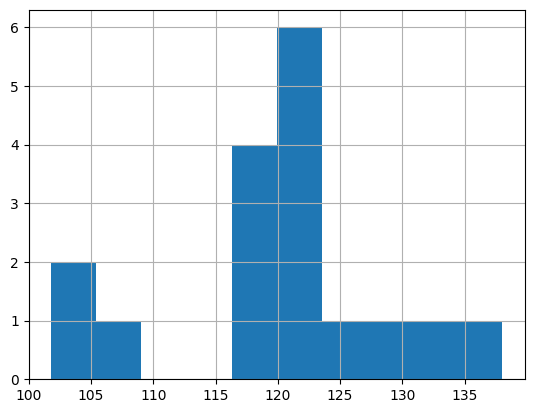

In [863]:
nutrition[nutrition.vitamin_c_mg.between(mp2sd, mp3sd)].vitamin_c_mg.hist()